# Python Assignment 10  
In this assignment you are going to make a photograph look like it was painted with the pointillism technique. There is a fine library to do this at https://github.com/matteo-ronchetti/Pointillism but you still have to use OpenCV to read the image and get the colors.

## Part 1
**1. Download the picture and read it in the program.**


In [1]:
import urllib.request as req
photo_url = "https://images.unsplash.com/photo-1503899036084-c55cdd92da26?ixlib.png"

#original image will be saved as painting.png
path = "./painting.png"
urlInfo = req.urlretrieve(photo_url, path)

**2. Show the picture in the notbook using OpenCv and matplotlib**

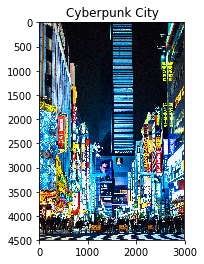

In [8]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt


image = cv2.imread('./painting.png')
# the swap of color channels is only necessary for inlining a picture with matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.title('Cyberpunk City')
plt.imshow(image, interpolation='none')

## Part 2
**1. Find the 20 most dominant colors. You will use them later to "paint" the picture.**


In [9]:
# Resizing the image, to prevent memory loss from finding 20 different clusters in a high resolution picture
def resize(image, new_x_dim):
    ratio = new_x_dim / image.shape[1]
    dim = (new_x_dim, int(image.shape[0] * ratio))
    
    # perform the actual resizing of the image and show it
    resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
    return resized_image

my_img = resize(image, 320)

# Resized image will be saves as small.jpg
cv2.imwrite("./small.jpg", my_img)

True

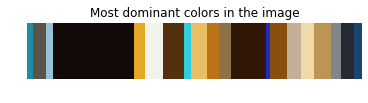

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
    

def find_histogram(clt):
    """
    create a histogram with k clusters
    """
    
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    hist = hist.astype("float")
    hist /= hist.sum()

    return hist

def plot_colors2(hist, centroids):
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar


img = cv2.imread("./small.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = img.reshape((img.shape[0] * img.shape[1],3)) #represent as row*column,channel number (to get every available pixel)
clt = KMeans(n_clusters=20) # amount of clusters we want (20)
clt.fit(img)

hist = find_histogram(clt)
bar = plot_colors2(hist, clt.cluster_centers_)

plt.axis("off")
plt.title("Most dominant colors in the image")
plt.imshow(bar)
plt.show()


# Part 3
**1. Use pointillism to create the painting**  
##### **(This might not work on mybinder as it opens a new window)**

In [11]:
!python main.py --img_path small.jpg

Automatically chosen stroke scale: 1
Automatically chosen gradient smoothing radius: 10
Computing color palette...
Extending color palette...
Computing gradient...
Smoothing gradient...
Drawing image...


  0% |                                                                        |
 50% |####################################                                    |
100% |########################################################################|



**2. Show the painting in the notebook** 

![](./small.jpg)

![](./small_drawing.jpg)